In [2]:
import pathlib
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
from datetime import datetime
import requests

In [3]:
fhirdata = pd.DataFrame(columns =['patientid','gender', 'birthDate',  'maritualStatus', 'totalCholesterol',"Triglycerides", 'lowDensity', 'highDensity', 'issued'] )

In [5]:
base_url = 'http://hapi-fhir.erc.monash.edu:8080/baseDstu3/'
diagnosticReport_url = base_url + 'DiagnosticReport'

In [6]:
def checkFunc(patientid,new_date):
    # check whether insert/update patient's information
    if patientid not in fhirdata.index:
        return True
    else:
        old_date = fhirdata.loc[patientid,'issued']
        if new_date > old_date:
            fhirdata.drop([patientid])
            return True
        else:
            return False

In [7]:
next_page = True
next_url = base_url + 'DiagnosticReport'
count_pages = 0
count_patient_with_cholesterol = 0

while next_page == True:
    diagonosticReport_data = requests.get(url=next_url).json()
    next_page = False
    links = diagonosticReport_data['link']
    for i in range(len(links)):
        link = links[i]
        if link['relation'] == 'next':
            next_page = True
            next_url = link['url']
            print(next_url)
            count_pages +=1
    print(count_pages)

    reports = diagonosticReport_data['entry']

    for i in range(len(reports)):
        patient_list=[]
        results = reports[i]['resource']['result']
        cholesterol = False
        for result in results:
            if result['display'] == 'Total Cholesterol':
                cholesterol = True
        if cholesterol == True:
            count_patient_with_cholesterol +=1
            # insert patient into the data framework
            patientid = reports[i]['resource']['subject']['reference'][len('Patient/'):]
            #print(patientid)
            issued = reports[i]['resource']['issued'][:len('2011-02-11')]
            date = datetime.strptime(issued, '%Y-%m-%d').date()
        
            patient_data = requests.get(url = base_url+'Patient/'+patientid).json()
            gender = patient_data['gender']
            birthDate = patient_data['birthDate']
            maritalStatus = patient_data['maritalStatus']['text']
            
            # check whether patient is inside the fhirdata, choose the latest one
            check = checkFunc(patientid,date)
            
            if check == True: 
                patient_list.append(patientid)
                patient_list.append(gender)
                patient_list.append(birthDate)
                patient_list.append(maritalStatus)


                #get cholestoral data
                cholestoral = [None]*3
                for result in results:
                    observation_ref = result['reference']
                    observation_display = result['display']

                    observation_data = requests.get(url = base_url + observation_ref).json()
                    value = observation_data['valueQuantity']['value']
                    #print(value)
                    patient_list.append(value)
                patient_list.append(date)
                fhirdata.loc[patientid] = patient_list
            #print(fhirdata)
        #print("index i: " + str(i) + ' / fhirdata size' + str(len(fhirdata)))
                
    if next_page == False:
        print(next_url)
print(count_patient_with_cholesterol)  

http://hapi-fhir.erc.monash.edu:8080/baseDstu3?_getpages=4acd5ee7-a93d-4424-8443-f5752547564b&_getpagesoffset=10&_count=10&_pretty=true&_bundletype=searchset
1
http://hapi-fhir.erc.monash.edu:8080/baseDstu3?_getpages=4acd5ee7-a93d-4424-8443-f5752547564b&_getpagesoffset=20&_count=10&_pretty=true&_bundletype=searchset
2
http://hapi-fhir.erc.monash.edu:8080/baseDstu3?_getpages=4acd5ee7-a93d-4424-8443-f5752547564b&_getpagesoffset=30&_count=10&_pretty=true&_bundletype=searchset
3
http://hapi-fhir.erc.monash.edu:8080/baseDstu3?_getpages=4acd5ee7-a93d-4424-8443-f5752547564b&_getpagesoffset=40&_count=10&_pretty=true&_bundletype=searchset
4
http://hapi-fhir.erc.monash.edu:8080/baseDstu3?_getpages=4acd5ee7-a93d-4424-8443-f5752547564b&_getpagesoffset=50&_count=10&_pretty=true&_bundletype=searchset
5
http://hapi-fhir.erc.monash.edu:8080/baseDstu3?_getpages=4acd5ee7-a93d-4424-8443-f5752547564b&_getpagesoffset=60&_count=10&_pretty=true&_bundletype=searchset
6
http://hapi-fhir.erc.monash.edu:8080/bas

http://hapi-fhir.erc.monash.edu:8080/baseDstu3?_getpages=4acd5ee7-a93d-4424-8443-f5752547564b&_getpagesoffset=520&_count=10&_pretty=true&_bundletype=searchset
52
http://hapi-fhir.erc.monash.edu:8080/baseDstu3?_getpages=4acd5ee7-a93d-4424-8443-f5752547564b&_getpagesoffset=530&_count=10&_pretty=true&_bundletype=searchset
53
http://hapi-fhir.erc.monash.edu:8080/baseDstu3?_getpages=4acd5ee7-a93d-4424-8443-f5752547564b&_getpagesoffset=540&_count=10&_pretty=true&_bundletype=searchset
54
http://hapi-fhir.erc.monash.edu:8080/baseDstu3?_getpages=4acd5ee7-a93d-4424-8443-f5752547564b&_getpagesoffset=550&_count=10&_pretty=true&_bundletype=searchset
55
http://hapi-fhir.erc.monash.edu:8080/baseDstu3?_getpages=4acd5ee7-a93d-4424-8443-f5752547564b&_getpagesoffset=560&_count=10&_pretty=true&_bundletype=searchset
56
http://hapi-fhir.erc.monash.edu:8080/baseDstu3?_getpages=4acd5ee7-a93d-4424-8443-f5752547564b&_getpagesoffset=570&_count=10&_pretty=true&_bundletype=searchset
57
http://hapi-fhir.erc.monash.

http://hapi-fhir.erc.monash.edu:8080/baseDstu3?_getpages=4acd5ee7-a93d-4424-8443-f5752547564b&_getpagesoffset=1030&_count=10&_pretty=true&_bundletype=searchset
103
http://hapi-fhir.erc.monash.edu:8080/baseDstu3?_getpages=4acd5ee7-a93d-4424-8443-f5752547564b&_getpagesoffset=1040&_count=10&_pretty=true&_bundletype=searchset
104
http://hapi-fhir.erc.monash.edu:8080/baseDstu3?_getpages=4acd5ee7-a93d-4424-8443-f5752547564b&_getpagesoffset=1050&_count=10&_pretty=true&_bundletype=searchset
105
http://hapi-fhir.erc.monash.edu:8080/baseDstu3?_getpages=4acd5ee7-a93d-4424-8443-f5752547564b&_getpagesoffset=1060&_count=10&_pretty=true&_bundletype=searchset
106
http://hapi-fhir.erc.monash.edu:8080/baseDstu3?_getpages=4acd5ee7-a93d-4424-8443-f5752547564b&_getpagesoffset=1070&_count=10&_pretty=true&_bundletype=searchset
107
http://hapi-fhir.erc.monash.edu:8080/baseDstu3?_getpages=4acd5ee7-a93d-4424-8443-f5752547564b&_getpagesoffset=1080&_count=10&_pretty=true&_bundletype=searchset
108
http://hapi-fhir

http://hapi-fhir.erc.monash.edu:8080/baseDstu3?_getpages=4acd5ee7-a93d-4424-8443-f5752547564b&_getpagesoffset=1530&_count=10&_pretty=true&_bundletype=searchset
153
http://hapi-fhir.erc.monash.edu:8080/baseDstu3?_getpages=4acd5ee7-a93d-4424-8443-f5752547564b&_getpagesoffset=1540&_count=10&_pretty=true&_bundletype=searchset
154
http://hapi-fhir.erc.monash.edu:8080/baseDstu3?_getpages=4acd5ee7-a93d-4424-8443-f5752547564b&_getpagesoffset=1550&_count=10&_pretty=true&_bundletype=searchset
155
http://hapi-fhir.erc.monash.edu:8080/baseDstu3?_getpages=4acd5ee7-a93d-4424-8443-f5752547564b&_getpagesoffset=1560&_count=10&_pretty=true&_bundletype=searchset
156
http://hapi-fhir.erc.monash.edu:8080/baseDstu3?_getpages=4acd5ee7-a93d-4424-8443-f5752547564b&_getpagesoffset=1570&_count=10&_pretty=true&_bundletype=searchset
157
http://hapi-fhir.erc.monash.edu:8080/baseDstu3?_getpages=4acd5ee7-a93d-4424-8443-f5752547564b&_getpagesoffset=1580&_count=10&_pretty=true&_bundletype=searchset
158
http://hapi-fhir

http://hapi-fhir.erc.monash.edu:8080/baseDstu3?_getpages=4acd5ee7-a93d-4424-8443-f5752547564b&_getpagesoffset=2030&_count=10&_pretty=true&_bundletype=searchset
203
http://hapi-fhir.erc.monash.edu:8080/baseDstu3?_getpages=4acd5ee7-a93d-4424-8443-f5752547564b&_getpagesoffset=2040&_count=10&_pretty=true&_bundletype=searchset
204
http://hapi-fhir.erc.monash.edu:8080/baseDstu3?_getpages=4acd5ee7-a93d-4424-8443-f5752547564b&_getpagesoffset=2050&_count=10&_pretty=true&_bundletype=searchset
205
http://hapi-fhir.erc.monash.edu:8080/baseDstu3?_getpages=4acd5ee7-a93d-4424-8443-f5752547564b&_getpagesoffset=2060&_count=10&_pretty=true&_bundletype=searchset
206
http://hapi-fhir.erc.monash.edu:8080/baseDstu3?_getpages=4acd5ee7-a93d-4424-8443-f5752547564b&_getpagesoffset=2070&_count=10&_pretty=true&_bundletype=searchset
207
http://hapi-fhir.erc.monash.edu:8080/baseDstu3?_getpages=4acd5ee7-a93d-4424-8443-f5752547564b&_getpagesoffset=2080&_count=10&_pretty=true&_bundletype=searchset
208
http://hapi-fhir

http://hapi-fhir.erc.monash.edu:8080/baseDstu3?_getpages=4acd5ee7-a93d-4424-8443-f5752547564b&_getpagesoffset=2530&_count=10&_pretty=true&_bundletype=searchset
253
http://hapi-fhir.erc.monash.edu:8080/baseDstu3?_getpages=4acd5ee7-a93d-4424-8443-f5752547564b&_getpagesoffset=2540&_count=10&_pretty=true&_bundletype=searchset
254
http://hapi-fhir.erc.monash.edu:8080/baseDstu3?_getpages=4acd5ee7-a93d-4424-8443-f5752547564b&_getpagesoffset=2550&_count=10&_pretty=true&_bundletype=searchset
255
http://hapi-fhir.erc.monash.edu:8080/baseDstu3?_getpages=4acd5ee7-a93d-4424-8443-f5752547564b&_getpagesoffset=2560&_count=10&_pretty=true&_bundletype=searchset
256
http://hapi-fhir.erc.monash.edu:8080/baseDstu3?_getpages=4acd5ee7-a93d-4424-8443-f5752547564b&_getpagesoffset=2570&_count=10&_pretty=true&_bundletype=searchset
257
http://hapi-fhir.erc.monash.edu:8080/baseDstu3?_getpages=4acd5ee7-a93d-4424-8443-f5752547564b&_getpagesoffset=2580&_count=10&_pretty=true&_bundletype=searchset
258
http://hapi-fhir

http://hapi-fhir.erc.monash.edu:8080/baseDstu3?_getpages=4acd5ee7-a93d-4424-8443-f5752547564b&_getpagesoffset=3030&_count=10&_pretty=true&_bundletype=searchset
303
http://hapi-fhir.erc.monash.edu:8080/baseDstu3?_getpages=4acd5ee7-a93d-4424-8443-f5752547564b&_getpagesoffset=3040&_count=10&_pretty=true&_bundletype=searchset
304
http://hapi-fhir.erc.monash.edu:8080/baseDstu3?_getpages=4acd5ee7-a93d-4424-8443-f5752547564b&_getpagesoffset=3050&_count=10&_pretty=true&_bundletype=searchset
305
http://hapi-fhir.erc.monash.edu:8080/baseDstu3?_getpages=4acd5ee7-a93d-4424-8443-f5752547564b&_getpagesoffset=3060&_count=10&_pretty=true&_bundletype=searchset
306
http://hapi-fhir.erc.monash.edu:8080/baseDstu3?_getpages=4acd5ee7-a93d-4424-8443-f5752547564b&_getpagesoffset=3070&_count=10&_pretty=true&_bundletype=searchset
307
http://hapi-fhir.erc.monash.edu:8080/baseDstu3?_getpages=4acd5ee7-a93d-4424-8443-f5752547564b&_getpagesoffset=3080&_count=10&_pretty=true&_bundletype=searchset
308
http://hapi-fhir

http://hapi-fhir.erc.monash.edu:8080/baseDstu3?_getpages=4acd5ee7-a93d-4424-8443-f5752547564b&_getpagesoffset=3530&_count=10&_pretty=true&_bundletype=searchset
353
http://hapi-fhir.erc.monash.edu:8080/baseDstu3?_getpages=4acd5ee7-a93d-4424-8443-f5752547564b&_getpagesoffset=3540&_count=10&_pretty=true&_bundletype=searchset
354
http://hapi-fhir.erc.monash.edu:8080/baseDstu3?_getpages=4acd5ee7-a93d-4424-8443-f5752547564b&_getpagesoffset=3550&_count=10&_pretty=true&_bundletype=searchset
355
http://hapi-fhir.erc.monash.edu:8080/baseDstu3?_getpages=4acd5ee7-a93d-4424-8443-f5752547564b&_getpagesoffset=3560&_count=10&_pretty=true&_bundletype=searchset
356
http://hapi-fhir.erc.monash.edu:8080/baseDstu3?_getpages=4acd5ee7-a93d-4424-8443-f5752547564b&_getpagesoffset=3570&_count=10&_pretty=true&_bundletype=searchset
357
http://hapi-fhir.erc.monash.edu:8080/baseDstu3?_getpages=4acd5ee7-a93d-4424-8443-f5752547564b&_getpagesoffset=3580&_count=10&_pretty=true&_bundletype=searchset
358
http://hapi-fhir

http://hapi-fhir.erc.monash.edu:8080/baseDstu3?_getpages=4acd5ee7-a93d-4424-8443-f5752547564b&_getpagesoffset=4030&_count=10&_pretty=true&_bundletype=searchset
403
http://hapi-fhir.erc.monash.edu:8080/baseDstu3?_getpages=4acd5ee7-a93d-4424-8443-f5752547564b&_getpagesoffset=4040&_count=10&_pretty=true&_bundletype=searchset
404
http://hapi-fhir.erc.monash.edu:8080/baseDstu3?_getpages=4acd5ee7-a93d-4424-8443-f5752547564b&_getpagesoffset=4050&_count=10&_pretty=true&_bundletype=searchset
405
http://hapi-fhir.erc.monash.edu:8080/baseDstu3?_getpages=4acd5ee7-a93d-4424-8443-f5752547564b&_getpagesoffset=4060&_count=10&_pretty=true&_bundletype=searchset
406
http://hapi-fhir.erc.monash.edu:8080/baseDstu3?_getpages=4acd5ee7-a93d-4424-8443-f5752547564b&_getpagesoffset=4070&_count=10&_pretty=true&_bundletype=searchset
407
http://hapi-fhir.erc.monash.edu:8080/baseDstu3?_getpages=4acd5ee7-a93d-4424-8443-f5752547564b&_getpagesoffset=4080&_count=10&_pretty=true&_bundletype=searchset
408
http://hapi-fhir

http://hapi-fhir.erc.monash.edu:8080/baseDstu3?_getpages=4acd5ee7-a93d-4424-8443-f5752547564b&_getpagesoffset=4530&_count=10&_pretty=true&_bundletype=searchset
453
http://hapi-fhir.erc.monash.edu:8080/baseDstu3?_getpages=4acd5ee7-a93d-4424-8443-f5752547564b&_getpagesoffset=4540&_count=10&_pretty=true&_bundletype=searchset
454
http://hapi-fhir.erc.monash.edu:8080/baseDstu3?_getpages=4acd5ee7-a93d-4424-8443-f5752547564b&_getpagesoffset=4550&_count=10&_pretty=true&_bundletype=searchset
455
http://hapi-fhir.erc.monash.edu:8080/baseDstu3?_getpages=4acd5ee7-a93d-4424-8443-f5752547564b&_getpagesoffset=4560&_count=10&_pretty=true&_bundletype=searchset
456
http://hapi-fhir.erc.monash.edu:8080/baseDstu3?_getpages=4acd5ee7-a93d-4424-8443-f5752547564b&_getpagesoffset=4570&_count=10&_pretty=true&_bundletype=searchset
457
http://hapi-fhir.erc.monash.edu:8080/baseDstu3?_getpages=4acd5ee7-a93d-4424-8443-f5752547564b&_getpagesoffset=4580&_count=10&_pretty=true&_bundletype=searchset
458
http://hapi-fhir

http://hapi-fhir.erc.monash.edu:8080/baseDstu3?_getpages=4acd5ee7-a93d-4424-8443-f5752547564b&_getpagesoffset=5040&_count=10&_pretty=true&_bundletype=searchset
504
http://hapi-fhir.erc.monash.edu:8080/baseDstu3?_getpages=4acd5ee7-a93d-4424-8443-f5752547564b&_getpagesoffset=5050&_count=10&_pretty=true&_bundletype=searchset
505
http://hapi-fhir.erc.monash.edu:8080/baseDstu3?_getpages=4acd5ee7-a93d-4424-8443-f5752547564b&_getpagesoffset=5060&_count=10&_pretty=true&_bundletype=searchset
506
http://hapi-fhir.erc.monash.edu:8080/baseDstu3?_getpages=4acd5ee7-a93d-4424-8443-f5752547564b&_getpagesoffset=5070&_count=10&_pretty=true&_bundletype=searchset
507
http://hapi-fhir.erc.monash.edu:8080/baseDstu3?_getpages=4acd5ee7-a93d-4424-8443-f5752547564b&_getpagesoffset=5080&_count=10&_pretty=true&_bundletype=searchset
508
http://hapi-fhir.erc.monash.edu:8080/baseDstu3?_getpages=4acd5ee7-a93d-4424-8443-f5752547564b&_getpagesoffset=5090&_count=10&_pretty=true&_bundletype=searchset
509
http://hapi-fhir

In [8]:
fhirdata

,patientid,gender,birthDate,maritualStatus,totalCholesterol,Triglycerides,lowDensity,highDensity,issued
95351,95351,male,1951-08-08,M,198.715371,149.923347,93.341805,75.388896,2016-11-02
105329,105329,female,1979-05-22,M,220.848174,190.973841,130.625559,52.027846,2016-05-10
95533,95533,male,1955-02-10,S,162.250776,173.231002,124.408832,33.037192,2019-03-18
106002,106002,female,1951-10-15,M,155.319703,151.206764,96.470399,72.357836,2019-02-05
106399,106399,female,1979-02-03,M,162.709395,131.943518,68.071220,68.249472,2018-12-01
...,...,...,...,...,...,...,...,...,...
86123,86123,female,1974-08-13,M,161.073698,147.065740,67.712838,63.947711,2015-10-27
86286,86286,male,1951-06-26,M,197.052226,105.095023,108.634595,67.398626,2016-06-14
104921,104921,male,1961-09-21,M,187.491146,143.170621,82.711031,76.145990,2012-04-05
105167,105167,female,1977-10-05,M,170.827770,135.898424,80.234724,63.413361,2017-09-13


In [9]:
fhirdata.isna().sum()

patientid           0
gender              0
birthDate           0
maritualStatus      0
totalCholesterol    0
Triglycerides       0
lowDensity          0
highDensity         0
issued              0
dtype: int64

In [10]:
fhirdata['maritualStatus'] = fhirdata['maritualStatus'].map(lambda x: {'M': 'Married', 'S': 'Single'}.get(x))
fhirdata.tail()

,patientid,gender,birthDate,maritualStatus,totalCholesterol,Triglycerides,lowDensity,highDensity,issued
86123,86123,female,1974-08-13,Married,161.073698,147.065740,67.712838,63.947711,2015-10-27
86286,86286,male,1951-06-26,Married,197.052226,105.095023,108.634595,67.398626,2016-06-14
104921,104921,male,1961-09-21,Married,187.491146,143.170621,82.711031,76.145990,2012-04-05
105167,105167,female,1977-10-05,Married,170.827770,135.898424,80.234724,63.413361,2017-09-13
117745,117745,female,1970-08-22,Married,165.700146,142.332017,60.379737,76.854006,2016-09-10


In [11]:
dataset = pd.get_dummies(fhirdata, prefix='', prefix_sep = '', columns = ['gender', 'maritualStatus'])
dataset.tail()

,patientid,birthDate,totalCholesterol,Triglycerides,lowDensity,highDensity,issued,female,male,Married,Single
86123,86123,1974-08-13,161.073698,147.065740,67.712838,63.947711,2015-10-27,1,0,1,0
86286,86286,1951-06-26,197.052226,105.095023,108.634595,67.398626,2016-06-14,0,1,1,0
104921,104921,1961-09-21,187.491146,143.170621,82.711031,76.145990,2012-04-05,0,1,1,0
105167,105167,1977-10-05,170.827770,135.898424,80.234724,63.413361,2017-09-13,1,0,1,0
117745,117745,1970-08-22,165.700146,142.332017,60.379737,76.854006,2016-09-10,1,0,1,0


In [12]:
dataset2 = dataset.reset_index()

In [13]:
dataset2

,index,patientid,birthDate,totalCholesterol,Triglycerides,lowDensity,highDensity,issued,female,male,Married,Single
0,95351,95351,1951-08-08,198.715371,149.923347,93.341805,75.388896,2016-11-02,0,1,1,0
1,105329,105329,1979-05-22,220.848174,190.973841,130.625559,52.027846,2016-05-10,1,0,1,0
2,95533,95533,1955-02-10,162.250776,173.231002,124.408832,33.037192,2019-03-18,0,1,0,1
3,106002,106002,1951-10-15,155.319703,151.206764,96.470399,72.357836,2019-02-05,1,0,1,0
4,106399,106399,1979-02-03,162.709395,131.943518,68.071220,68.249472,2018-12-01,1,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...
301,86123,86123,1974-08-13,161.073698,147.065740,67.712838,63.947711,2015-10-27,1,0,1,0
302,86286,86286,1951-06-26,197.052226,105.095023,108.634595,67.398626,2016-06-14,0,1,1,0
303,104921,104921,1961-09-21,187.491146,143.170621,82.711031,76.145990,2012-04-05,0,1,1,0
304,105167,105167,1977-10-05,170.827770,135.898424,80.234724,63.413361,2017-09-13,1,0,1,0


In [19]:
# from datetime import datetime
dataset2['age'] = 0.0
for index, row in dataset2.iterrows(): 
    dataset2.at[index, 'age'] = row['issued'].year - int(row['birthDate'][0:4])
dataset2.tail()

,index,patientid,birthDate,totalCholesterol,Triglycerides,lowDensity,highDensity,issued,female,male,Married,Single,age
301,86123,86123,1974-08-13,161.073698,147.065740,67.712838,63.947711,2015-10-27,1,0,1,0,41.0
302,86286,86286,1951-06-26,197.052226,105.095023,108.634595,67.398626,2016-06-14,0,1,1,0,65.0
303,104921,104921,1961-09-21,187.491146,143.170621,82.711031,76.145990,2012-04-05,0,1,1,0,51.0
304,105167,105167,1977-10-05,170.827770,135.898424,80.234724,63.413361,2017-09-13,1,0,1,0,40.0
305,117745,117745,1970-08-22,165.700146,142.332017,60.379737,76.854006,2016-09-10,1,0,1,0,46.0


In [20]:
dataset2 =dataset2.drop(columns = 'index')
dataset2

,patientid,birthDate,totalCholesterol,Triglycerides,lowDensity,highDensity,issued,female,male,Married,Single,age
0,95351,1951-08-08,198.715371,149.923347,93.341805,75.388896,2016-11-02,0,1,1,0,65.0
1,105329,1979-05-22,220.848174,190.973841,130.625559,52.027846,2016-05-10,1,0,1,0,37.0
2,95533,1955-02-10,162.250776,173.231002,124.408832,33.037192,2019-03-18,0,1,0,1,64.0
3,106002,1951-10-15,155.319703,151.206764,96.470399,72.357836,2019-02-05,1,0,1,0,68.0
4,106399,1979-02-03,162.709395,131.943518,68.071220,68.249472,2018-12-01,1,0,1,0,39.0
...,...,...,...,...,...,...,...,...,...,...,...,...
301,86123,1974-08-13,161.073698,147.065740,67.712838,63.947711,2015-10-27,1,0,1,0,41.0
302,86286,1951-06-26,197.052226,105.095023,108.634595,67.398626,2016-06-14,0,1,1,0,65.0
303,104921,1961-09-21,187.491146,143.170621,82.711031,76.145990,2012-04-05,0,1,1,0,51.0
304,105167,1977-10-05,170.827770,135.898424,80.234724,63.413361,2017-09-13,1,0,1,0,40.0


In [21]:
dataset3 =dataset2.drop(columns = ['Triglycerides', 'lowDensity', 'highDensity'])
dataset3.head()

,patientid,birthDate,totalCholesterol,issued,female,male,Married,Single,age
0,95351,1951-08-08,198.715371,2016-11-02,0,1,1,0,65.0
1,105329,1979-05-22,220.848174,2016-05-10,1,0,1,0,37.0
2,95533,1955-02-10,162.250776,2019-03-18,0,1,0,1,64.0
3,106002,1951-10-15,155.319703,2019-02-05,1,0,1,0,68.0
4,106399,1979-02-03,162.709395,2018-12-01,1,0,1,0,39.0


In [22]:
# split data into train set and test set
train_dataset = dataset3.sample(frac=0.8, random_state=0)
test_dataset = dataset3.drop(train_dataset.index)

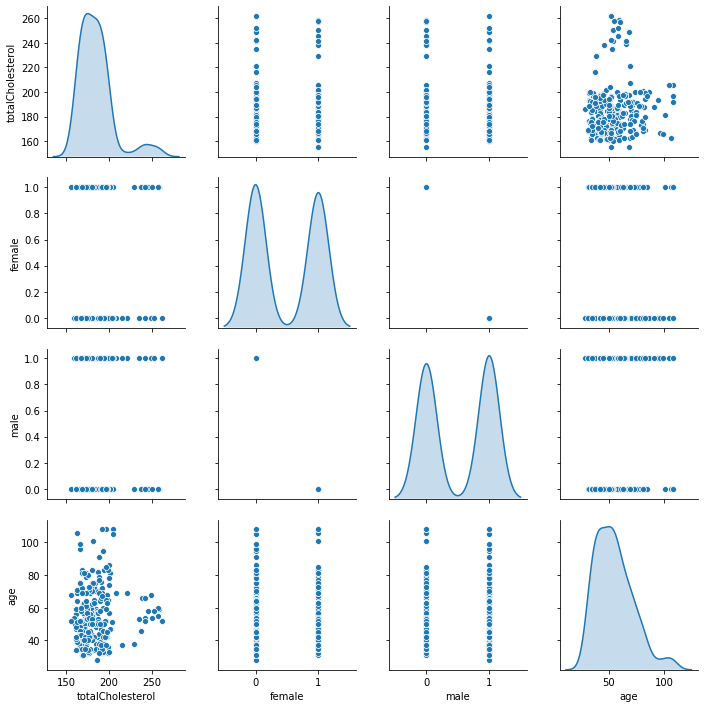

In [23]:
sns.pairplot(train_dataset[["birthDate", "totalCholesterol", "issued", "female", "male", "age"]],diag_kind="kde")

In [24]:
train_stats = train_dataset.describe()

In [25]:
train_stats.pop("totalCholesterol")

count    245.000000
mean     184.832954
std       20.096713
min      155.319703
25%      171.015904
50%      181.312840
75%      192.726206
max      261.763701
Name: totalCholesterol, dtype: float64

In [26]:
train_stats = train_stats.transpose()
train_stats

,count,mean,std,min,25%,50%,75%,max
female,245.0,0.485714,0.500819,0.0,0.0,0.0,1.0,1.0
male,245.0,0.514286,0.500819,0.0,0.0,1.0,1.0,1.0
Married,245.0,0.804082,0.397718,0.0,1.0,1.0,1.0,1.0
Single,245.0,0.195918,0.397718,0.0,0.0,0.0,0.0,1.0
age,245.0,55.044898,16.968933,28.0,42.0,52.0,65.0,108.0


In [27]:
train_dataset

,patientid,birthDate,totalCholesterol,issued,female,male,Married,Single,age
274,102899,1949-03-13,190.574682,2017-04-16,1,0,1,0,68.0
66,138407,1958-03-08,163.948577,2017-07-01,0,1,1,0,59.0
258,62264,1945-01-10,189.156979,2016-03-23,0,1,1,0,71.0
210,39548,1965-09-28,183.113023,2017-10-10,1,0,1,0,52.0
159,26302,1935-07-14,191.834362,2007-10-07,0,1,1,0,72.0
...,...,...,...,...,...,...,...,...,...
279,116943,1976-06-26,161.228962,2018-07-07,1,0,0,1,42.0
142,5180,1940-07-26,173.739216,2004-11-26,0,1,1,0,64.0
262,63140,1951-08-08,167.952800,2011-01-19,0,1,1,0,60.0
91,167855,1964-09-24,180.839162,2014-09-25,1,0,1,0,50.0


In [28]:
train_labels = train_dataset.pop('totalCholesterol')
test_labels = test_dataset.pop('totalCholesterol')

In [29]:
train_dataset2 = train_dataset.drop(columns = ['patientid', 'issued', 'birthDate'])
test_dataset2 = test_dataset.drop(columns = ['patientid', 'issued', 'birthDate'])
train_dataset2

,female,male,Married,Single,age
274,1,0,1,0,68.0
66,0,1,1,0,59.0
258,0,1,1,0,71.0
210,1,0,1,0,52.0
159,0,1,1,0,72.0
...,...,...,...,...,...
279,1,0,0,1,42.0
142,0,1,1,0,64.0
262,0,1,1,0,60.0
91,1,0,1,0,50.0


In [30]:
def build_model():
  model = keras.Sequential([
    layers.Dense(64, activation='relu', input_shape=[len(train_dataset2.keys())]),
    layers.Dense(64, activation='relu'),
    layers.Dense(1)
  ])

  optimizer = tf.keras.optimizers.RMSprop(0.001)

  model.compile(loss='mse',
                optimizer=optimizer,
                metrics=['mae', 'mse'])
  return model

In [31]:
import tensorflow as tf

from tensorflow import keras
from tensorflow.keras import layers
model = build_model()

/opt/miniconda3/envs/tensorflow/lib/python3.6/site-packages/tensorflow/python/framework/dtypes.py:516: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
/opt/miniconda3/envs/tensorflow/lib/python3.6/site-packages/tensorflow/python/framework/dtypes.py:517: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
/opt/miniconda3/envs/tensorflow/lib/python3.6/site-packages/tensorflow/python/framework/dtypes.py:518: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
/opt/miniconda3/envs/tensorflow/lib/python3.6/site-pack

In [32]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 64)                384       
_________________________________________________________________
dense_1 (Dense)              (None, 64)                4160      
_________________________________________________________________
dense_2 (Dense)              (None, 1)                 65        
Total params: 4,609
Trainable params: 4,609
Non-trainable params: 0
_________________________________________________________________


In [33]:
example_batch = train_dataset2[:10]
example_batch

,female,male,Married,Single,age
274,1,0,1,0,68.0
66,0,1,1,0,59.0
258,0,1,1,0,71.0
210,1,0,1,0,52.0
159,0,1,1,0,72.0
22,1,0,1,0,35.0
224,0,1,1,0,28.0
92,1,0,0,1,69.0
269,1,0,1,0,70.0
247,0,1,1,0,58.0


In [35]:
example_result = model.predict(example_batch)
example_result

array([[-10.527216 ],
       [ -9.118374 ],
       [-10.971439 ],
       [ -8.072801 ],
       [-11.125863 ],
       [ -5.4649844],
       [ -4.331241 ],
       [-10.66717  ],
       [-10.834022 ],
       [ -8.963952 ]], dtype=float32)

In [36]:
# Use seaborn for pairplot
# !pip install -q seaborn

# Use some functions from tensorflow_docs
!pip install -q git+https://github.com/tensorflow/docs

In [37]:
import tensorflow_docs as tfdocs
import tensorflow_docs.plots
import tensorflow_docs.modeling

In [38]:
EPOCHS = 1000

history = model.fit(
  train_dataset2, train_labels,
  epochs=EPOCHS, validation_split = 0.2, verbose=0,
  callbacks=[tfdocs.modeling.EpochDots()])


Epoch: 0, loss:34694.2997,  mae:185.0685,  mse:34694.3008,  val_loss:30720.8296,  val_mae:174.3880,  val_mse:30720.8281,  
....................................................................................................
Epoch: 100, loss:2598.0990,  mae:40.7986,  mse:2598.0991,  val_loss:2387.6545,  val_mae:43.2518,  val_mse:2387.6545,  
....................................................................................................
Epoch: 200, loss:1250.9201,  mae:27.9631,  mse:1250.9202,  val_loss:1215.0450,  val_mae:30.1906,  val_mse:1215.0449,  
....................................................................................................
Epoch: 300, loss:432.0152,  mae:15.1218,  mse:432.0153,  val_loss:371.2267,  val_mae:15.0159,  val_mse:371.2267,  
....................................................................................................
Epoch: 400, loss:490.6823,  mae:16.3756,  mse:490.6824,  val_loss:359.8306,  val_mae:14.5619,  val_mse:359.8306,  
....

In [39]:
hist = pd.DataFrame(history.history)
hist['epoch'] = history.epoch
hist.tail()

,loss,mae,mse,val_loss,val_mae,val_mse,epoch
995,416.502830,14.306607,416.502838,398.533760,13.494861,398.533752,995
996,452.725162,15.006288,452.725159,341.978821,13.171271,341.978821,996
997,417.639311,14.365751,417.639313,336.568089,13.291293,336.568085,997
998,439.759081,14.953950,439.759094,334.910543,13.758860,334.910553,998
999,415.260888,14.567245,415.260895,432.092314,14.111887,432.092316,999


In [40]:
plotter = tfdocs.plots.HistoryPlotter(smoothing_std=2)

Text(0, 0.5, 'MAE [totalCholesterol]')

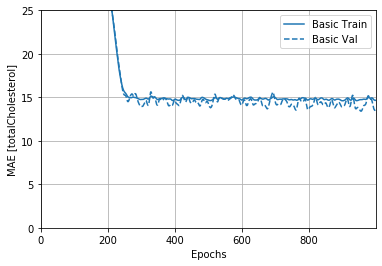

In [43]:
plotter.plot({'Basic': history}, metric = "mae")
plt.ylim([0, 25])
plt.ylabel('MAE [totalCholesterol]')

Text(0, 0.5, 'MSE [totalCholesterol^2]')

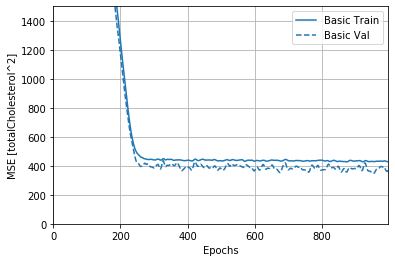

In [44]:
plotter.plot({'Basic': history}, metric = "mse")
plt.ylim([0, 1500])
plt.ylabel('MSE [totalCholesterol^2]')

In [45]:
model = build_model()

# The patience parameter is the amount of epochs to check for improvement
early_stop = keras.callbacks.EarlyStopping(monitor='val_loss', patience=10)

early_history = model.fit(train_dataset2, train_labels, 
                    epochs=EPOCHS, validation_split = 0.2, verbose=0, 
                    callbacks=[early_stop, tfdocs.modeling.EpochDots()])


Epoch: 0, loss:32873.5533,  mae:180.0184,  mse:32873.5547,  val_loss:29209.1711,  val_mae:169.9676,  val_mse:29209.1719,  
....................................................................................................
Epoch: 100, loss:2411.2460,  mae:39.4593,  mse:2411.2461,  val_loss:2208.5008,  val_mae:41.2845,  val_mse:2208.5007,  
....................................................................................................
Epoch: 200, loss:587.0576,  mae:18.2390,  mse:587.0576,  val_loss:520.3544,  val_mae:17.4896,  val_mse:520.3544,  
...........................................

Text(0, 0.5, 'MAE [totalCholesterol]')

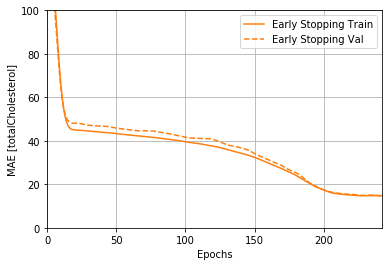

In [46]:
plotter.plot({'Early Stopping': early_history}, metric = "mae")
plt.ylim([0, 100])
plt.ylabel('MAE [totalCholesterol]')

In [47]:
oss, mae, mse = model.evaluate(test_dataset2, test_labels, verbose=2)

print("Testing set Mean Abs Error: {:5.2f} MPG".format(mae))

61/61 - 0s - loss: 454.0027 - mae: 14.5538 - mse: 454.0027
Testing set Mean Abs Error: 14.55 MPG


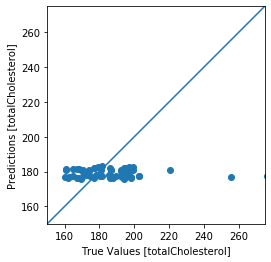

In [48]:
test_predictions = model.predict(test_dataset2).flatten()

a = plt.axes(aspect='equal')
plt.scatter(test_labels, test_predictions)
plt.xlabel('True Values [totalCholesterol]')
plt.ylabel('Predictions [totalCholesterol]')
lims = [150, 275]
plt.xlim(lims)
plt.ylim(lims)
_ = plt.plot(lims, lims)

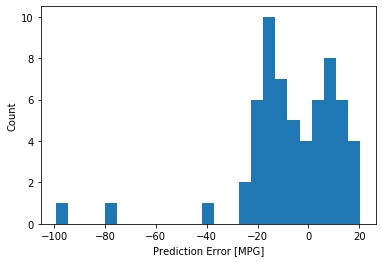

In [49]:
error = test_predictions - test_labels
plt.hist(error, bins = 25)
plt.xlabel("Prediction Error [MPG]")
_ = plt.ylabel("Count")

In [50]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_3 (Dense)              (None, 64)                384       
_________________________________________________________________
dense_4 (Dense)              (None, 64)                4160      
_________________________________________________________________
dense_5 (Dense)              (None, 1)                 65        
Total params: 4,609
Trainable params: 4,609
Non-trainable params: 0
_________________________________________________________________


In [51]:
!pip install -q pyyaml h5py  # Required to save models in HDF5 format


In [52]:
from __future__ import absolute_import, division, print_function, unicode_literals

import os

import tensorflow as tf
from tensorflow import keras

print(tf.version.VERSION)

2.0.0-beta1


In [53]:
model.save('simple_model3.h5')

In [58]:
new_model= tf.keras.models.load_model(filepath="/Users/shunyang/FHIR_coding/simple_model3.h5")
tflite_converter = tf.lite.TFLiteConverter.from_keras_model(new_model)
tflite_model = tflite_converter.convert()
open("tf_lite_model.tflite", "wb").write(tflite_model)


INFO:tensorflow:Converted 6 variables to const ops.


19808